<h1 style="font-family:Georgia, serif;color:black" align='Center'> CREDIT CARD LEAD PREDICTION </h1>

<h4 style="font-family:Georgia, serif;color:black" align='justify'>First and foremost, I'd like to express my gratitude for allowing me to take part in this hackathon. I've explained each line of code here, and I've also attached the detailed explanation in a solution file.</h4>

<h4 style="font-family:Georgia, serif;color:blue" align='Left'>Importing the necessary libraries and datasets</h4> 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
%matplotlib inline
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
le = LabelEncoder()
pca=PCA()
sc=StandardScaler()

from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

import random
import os
import time

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/CreditCardLeadPrediction_Jobathon/train_s3TEQDk.csv')
df_test = pd.read_csv('/content/drive/MyDrive/CreditCardLeadPrediction_Jobathon/test_mSzZ8RL.csv')
df_sample = pd.read_csv('/content/drive/MyDrive/CreditCardLeadPrediction_Jobathon/sample_submission_eyYijxG.csv')

<h4 style="font-family:Georgia, serif;color:blue" align='Left'>Exploring the dataset in order to construct the model</h4> 

In [5]:
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [8]:
df_train.shape, df_test.shape

((245725, 11), (105312, 10))

In [9]:
df_train.isnull().sum(), df_test.isnull().sum()

(ID                         0
 Gender                     0
 Age                        0
 Region_Code                0
 Occupation                 0
 Channel_Code               0
 Vintage                    0
 Credit_Product         29325
 Avg_Account_Balance        0
 Is_Active                  0
 Is_Lead                    0
 dtype: int64, ID                         0
 Gender                     0
 Age                        0
 Region_Code                0
 Occupation                 0
 Channel_Code               0
 Vintage                    0
 Credit_Product         12522
 Avg_Account_Balance        0
 Is_Active                  0
 dtype: int64)

In [10]:
#Finding the n-unique values in a categorical data
for col in df_train.select_dtypes('object').columns:
    print(col, df_train[col].nunique())

ID 245725
Gender 2
Region_Code 35
Occupation 4
Channel_Code 4
Credit_Product 2
Is_Active 2


In [11]:
for i in df_train:
    print(f'{i} : {df_train[i].unique()}')

ID : ['NNVBBKZB' 'IDD62UNG' 'HD3DSEMC' ... 'GEHAUCWT' 'GE7V8SAH' 'BOCZSWLJ']
Gender : ['Female' 'Male']
Age : [73 30 56 34 62 48 40 55 53 27 31 79 33 46 59 65 37 44 32 50 70 25 52 26
 67 29 41 49 63 61 64 60 76 57 36 28 58 43 35 71 82 45 42 54 47 78 51 68
 83 39 84 24 38 74 81 69 75 85 66 80 72 77 23]
Region_Code : ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
Occupation : ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
Channel_Code : ['X3' 'X1' 'X2' 'X4']
Vintage : [ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  97  15  63  21
  99  56  87  62  55 103 104  93  61  91  27  39  50  45  25 117  80  81
  73  67 109  92 122  75  79 121 111 116  85 115  86  37  74 110  44   9
  68  51  98 105 127 129 133   8   7 128 135 134]
Credit_Product : 

<h4 style="font-family:Georgia, serif;color:blue" align='Left'>Plotting the below columns for the best understanding of the data</h4>

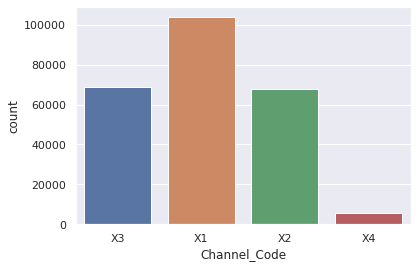

In [12]:
sns.set(style="darkgrid")
sns.countplot(df_train['Channel_Code'])

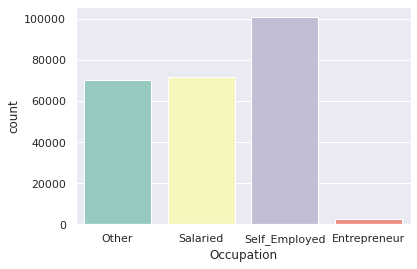

In [13]:
sns.countplot(df_train['Occupation'],palette="Set3")

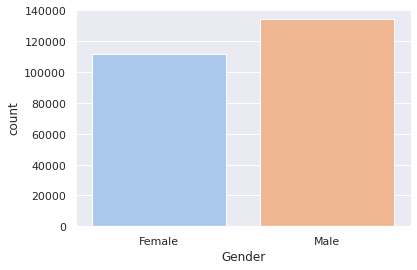

In [14]:
sns.countplot(df_train['Gender'],palette="pastel")

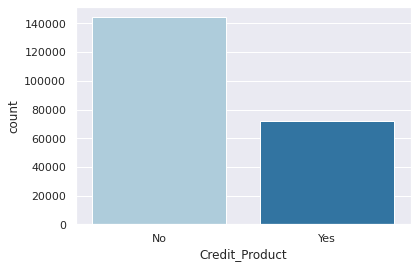

In [15]:
sns.set(style="darkgrid")
sns.countplot(df_train['Credit_Product'],palette="Paired")

<h4 style="font-family:Georgia, serif;color:blue" align='Left'>According to the above exploratory, the Credit_product column has null values. Filling the NaN rows backwords for the best fit</h4>

In [16]:
#Training Dataset
df_train['Credit_Product'] = df_train['Credit_Product'].fillna(method="bfill")

#Testing Dataset
df_test['Credit_Product'] = df_test['Credit_Product'].fillna(method="bfill")

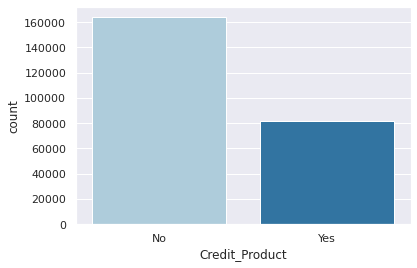

In [17]:
sns.set(style="darkgrid")
sns.countplot(df_train['Credit_Product'],palette="Paired")

<h4 style="font-family:Georgia, serif;color:blue" align='Justify'>Setting the ID column as an Index and Splitting the dataframe into feature columns and target column</h4>

In [18]:
#Training Dataset
df_train.set_index("ID",inplace=True)

#Testing Dataset
df_test.set_index("ID",inplace=True)

<h4 style="font-family:Georgia, serif;color:blue" align='Justify'>Converting the object columns into the numberical columns. For that Encoding the categorical columns using Label Encoder</h4>

In [19]:
#For Training dataset
label_columns = []
print("Categorical columns in the training dataset")
for col in df_train.select_dtypes('object').columns:
    print(col)
    label_columns.append(col)
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    
#For Testing dataset
label_columns_test = []
print("\nCategorical columns in the testing dataset")
for col2 in df_test.select_dtypes('object').columns:
    print(col2)
    label_columns_test.append(col2)
    le = LabelEncoder()
    df_test[col2] = le.fit_transform(df_test[col2])

Categorical columns in the training dataset
Gender
Region_Code
Occupation
Channel_Code
Credit_Product
Is_Active

Categorical columns in the testing dataset
Gender
Region_Code
Occupation
Channel_Code
Credit_Product
Is_Active


In [20]:
for i in df_train:
    print(f'{i} : {df_train[i].unique()}')

Gender : [0 1]
Age : [73 30 56 34 62 48 40 55 53 27 31 79 33 46 59 65 37 44 32 50 70 25 52 26
 67 29 41 49 63 61 64 60 76 57 36 28 58 43 35 71 82 45 42 54 47 78 51 68
 83 39 84 24 38 74 81 69 75 85 66 80 72 77 23]
Region_Code : [18 27 20 32 11 15 33  4 19  7 29 30  2 34  9 31  8 16 10 24  6 25 23 17
 22  1 12 14 28 26 13  0  5  3 21]
Occupation : [1 2 3 0]
Channel_Code : [2 0 1 3]
Vintage : [ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  97  15  63  21
  99  56  87  62  55 103 104  93  61  91  27  39  50  45  25 117  80  81
  73  67 109  92 122  75  79 121 111 116  85 115  86  37  74 110  44   9
  68  51  98 105 127 129 133   8   7 128 135 134]
Credit_Product : [0 1]
Avg_Account_Balance : [1045696  581988 1484315 ...  368949 1925586 1129276]
Is_Active : [0 1]
Is_Lead : [0 1]


In [21]:
def process_data(train,test):
   
    train['train_or_test']='train'
    test['train_or_test']='test'
    df=pd.concat([train,test])     
   
    return train,test,df
train,test,df = process_data(df_train,df_test)

In [22]:
def frequency_encoding(column_name,output_column_name,df):
    fe_pol = (df.groupby(column_name).size()) / len(df)
    df[output_column_name] = df[column_name].apply(lambda x : fe_pol[x])

In [23]:
# seed the random number generator
def find_outlier(df):
    seed(1)
    # generate univariate observations
    data = df
    # calculate summary statistics
    data_mean, data_std = mean(data), std(data)
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))

In [24]:
find_outlier(df["Avg_Account_Balance"])

Identified outliers: 7033
Non-outlier observations: 344004


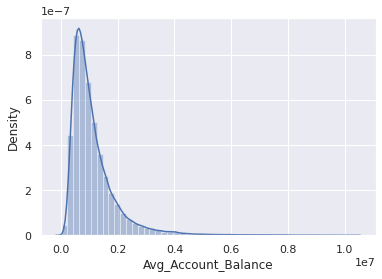

In [25]:
sns.distplot(df['Avg_Account_Balance'])

In [26]:
df['Avg_Account_Balance'] = np.log(df['Avg_Account_Balance'])

In [27]:
find_outlier(df["Avg_Account_Balance"])

Identified outliers: 1926
Non-outlier observations: 349111


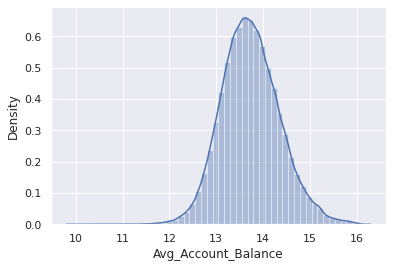

In [28]:
sns.distplot(df['Avg_Account_Balance'])

In [29]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,train_or_test
ID,,,,,,,,,,,
NNVBBKZB,0,73,18,1,2,43,0,13.860193,0,0.0,train
IDD62UNG,0,30,27,2,0,32,0,13.274205,0,0.0,train
HD3DSEMC,0,56,18,3,2,26,0,14.210464,1,0.0,train
BF3NC7KV,1,34,20,2,0,19,0,13.061453,0,0.0,train
TEASRWXV,0,30,32,2,0,33,0,13.695360,0,0.0,train


<h3 style="font-family:Georgia, serif;color:blue" align='Justify'>Buliding model using H2O</h3>

In [30]:
df_train = pd.read_csv('/content/drive/MyDrive/CreditCardLeadPrediction_Jobathon/train_s3TEQDk.csv')
df_test = pd.read_csv('/content/drive/MyDrive/CreditCardLeadPrediction_Jobathon/test_mSzZ8RL.csv')
df_sample = pd.read_csv('/content/drive/MyDrive/CreditCardLeadPrediction_Jobathon/sample_submission_eyYijxG.csv')

In [31]:
df_train['Avg_Account_Balance'] = np.log(df_train['Avg_Account_Balance'])
df_test['Avg_Account_Balance'] = np.log(df_test['Avg_Account_Balance'])

In [33]:
!pip install h2o


     |████████████████████████████████| 164.8MB 96kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.3-py2.py3-none-any.whl size=164854343 sha256=add482c8abd231a9f82070a187b6287b361fbad48dffca06bbb873fe65cffdb6
  Stored in directory: /root/.cache/pip/wheels/4f/bb/82/0988682f9abd0b5e95109a4aae6793dd427173b6dc671d9252
Successfully built h2o


In [34]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [35]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpnk2lad1j
  JVM stdout: /tmp/tmpnk2lad1j/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpnk2lad1j/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_unknownUser_1mxggm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.174 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [36]:
h2o.connect()

Connecting to H2O server at http://localhost:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_unknownUser_1mxggm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.174 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


<H2OConnection to http://localhost:54321, no session>

In [37]:
h2o_train = h2o.H2OFrame(df_train)
h2o_test = h2o.H2OFrame(df_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [38]:
h2o_train.describe()

Rows:245725
Cols:11




,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
type,string,enum,int,enum,enum,enum,int,enum,real,enum,int
mins,NaN,,23.0,,,,7.0,,9.942227380852058,,0.0
mean,NaN,,43.85630684708504,,,,46.959141316512344,,13.733421030458603,,0.23720826126767727
maxs,NaN,,85.0,,,,135.0,,16.15269116511966,,1.0
sigma,NaN,,14.828671804648026,,,,32.35313570875424,,0.6197575308147667,,0.42537188248718916
zeros,0,,0,,,,0,,0,,187437
missing,0,0,0,0,0,0,0,0,0,0,0
0,NNVBBKZB,Female,73.0,RG268,Other,X3,43.0,No,13.860193250390497,No,0.0
1,IDD62UNG,Female,30.0,RG277,Salaried,X1,32.0,No,13.274205107944308,No,0.0
2,HD3DSEMC,Female,56.0,RG268,Self_Employed,X3,26.0,No,14.210463944335558,Yes,0.0


In [39]:
h2o_train.columns

['ID',
 'Gender',
 'Age',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Vintage',
 'Credit_Product',
 'Avg_Account_Balance',
 'Is_Active',
 'Is_Lead']

In [40]:
train, valid, test = h2o_train.split_frame(ratios=[0.6,0.2], seed=1234)
response = "Is_Lead"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  147609 49083 49033


In [41]:
predictors = h2o_train.columns[:-1]
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [42]:
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1622387369297_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,25072.0,5.0,5.0,5.0,25.0,32.0,30.88




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.10250531771048872
RMSE: 0.32016451663244744
LogLoss: 0.3405670455789159
Mean Per-Class Error: 0.1928603207170545
AUC: 0.877024796348631
AUCPR: 0.7604627400606558
Gini: 0.7540495926972619

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35648148703790666: 


,,0,1,Error,Rate
0,0,101936.0,10828.0,0.096,(10828.0/112764.0)
1,1,10943.0,23902.0,0.314,(10943.0/34845.0)
2,Total,112879.0,34730.0,0.1475,(21771.0/147609.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.356481,0.687086,197.0
1,max f2,0.165877,0.743286,289.0
2,max f0point5,0.546460,0.744609,123.0
3,max accuracy,0.472804,0.863105,147.0
4,max precision,0.981924,1.000000,0.0
5,max recall,0.023719,1.000000,399.0
6,max specificity,0.981924,1.000000,0.0
7,max absolute_mcc,0.425132,0.595553,168.0
8,max min_per_class_accuracy,0.204993,0.804907,268.0
9,max mean_per_class_accuracy,0.255904,0.807140,243.0



Gains/Lift Table: Avg response rate: 23.61 %, avg score: 23.61 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010006,0.968321,4.233292,4.233292,0.999323,0.976820,0.999323,0.976820,0.042359,0.042359,323.329205,323.329205,0.042350
1,2,0.020006,0.896900,4.167279,4.200297,0.983740,0.941748,0.991534,0.959290,0.041670,0.084029,316.727949,320.029695,0.083808
2,3,0.030005,0.860775,3.946287,4.115646,0.931572,0.871791,0.971551,0.930130,0.039460,0.123490,294.628739,311.564621,0.122372
3,4,0.040018,0.851803,3.743183,4.022452,0.883627,0.855994,0.949551,0.911580,0.037480,0.160970,274.318345,302.245170,0.158327
4,5,0.050004,0.844715,3.704485,3.958953,0.874491,0.848121,0.934562,0.898908,0.036992,0.197962,270.448468,295.895307,0.193679
5,6,0.100001,0.825360,3.585238,3.772108,0.846341,0.834816,0.890455,0.866864,0.179251,0.377213,258.523797,277.210818,0.362874
6,7,0.150614,0.504086,2.960379,3.499329,0.698835,0.702298,0.826062,0.811562,0.149835,0.527048,196.037908,249.932894,0.492755
7,8,0.200028,0.422701,2.051872,3.141754,0.484371,0.459508,0.741651,0.724592,0.101392,0.628440,105.187192,214.175421,0.560795
8,9,0.300178,0.251041,1.408710,2.563551,0.332544,0.329148,0.605159,0.592658,0.141082,0.769522,40.871022,156.355138,0.614375
9,10,0.400030,0.149658,0.769401,2.115713,0.181627,0.195888,0.499441,0.493620,0.076826,0.846348,-23.059904,111.571262,0.584234




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-05-30 15:09:45,0.102 sec,0.0,0.424661,0.546499,0.500000,0.236063,1.000000,0.763937
1,,2021-05-30 15:09:47,1.615 sec,1.0,0.406962,0.507834,0.865346,0.733779,4.183443,0.162585
2,,2021-05-30 15:09:47,2.051 sec,2.0,0.392481,0.479381,0.866832,0.736462,4.183443,0.161894
3,,2021-05-30 15:09:48,2.448 sec,3.0,0.380572,0.457314,0.867331,0.737989,4.183161,0.161894
4,,2021-05-30 15:09:48,2.725 sec,4.0,0.370861,0.439850,0.867300,0.738068,4.183161,0.161894
5,,2021-05-30 15:09:48,2.968 sec,5.0,0.362722,0.425379,0.867648,0.739308,4.197296,0.155953
6,,2021-05-30 15:09:49,3.219 sec,6.0,0.356096,0.413591,0.868136,0.739959,4.197207,0.155953
7,,2021-05-30 15:09:49,3.428 sec,7.0,0.350534,0.403597,0.868201,0.741273,4.197632,0.151630
8,,2021-05-30 15:09:49,3.681 sec,8.0,0.345971,0.395243,0.869092,0.742502,4.197632,0.152064
9,,2021-05-30 15:09:49,3.899 sec,9.0,0.342098,0.388009,0.869334,0.743258,4.218436,0.151651



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Credit_Product,47932.980469,1.000000,0.803028
1,Vintage,4298.886719,0.089685,0.072020
2,Occupation,3408.041504,0.071100,0.057095
3,Is_Active,1483.279785,0.030945,0.024850
4,Age,1344.469849,0.028049,0.022524
5,Channel_Code,572.789673,0.011950,0.009596
6,Region_Code,532.656250,0.011113,0.008924
7,Avg_Account_Balance,94.750282,0.001977,0.001587
8,Gender,22.437082,0.000468,0.000376


In [43]:
gbm_perf = gbm.model_performance(valid)
print(gbm_perf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1048522008949373
RMSE: 0.32380889563898224
LogLoss: 0.3471990590253146
Mean Per-Class Error: 0.19374017487796036
AUC: 0.8744153059597524
AUCPR: 0.7550132601463361
Gini: 0.7488306119195047

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31894418658509843: 


,,0,1,Error,Rate
0,0,32995.0,4182.0,0.1125,(4182.0/37177.0)
1,1,3466.0,8440.0,0.2911,(3466.0/11906.0)
2,Total,36461.0,12622.0,0.1558,(7648.0/49083.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.318944,0.688193,215.0
1,max f2,0.154659,0.750000,295.0
2,max f0point5,0.567081,0.747372,119.0
3,max accuracy,0.478381,0.859381,148.0
4,max precision,0.983117,1.000000,0.0
5,max recall,0.024040,1.000000,399.0
6,max specificity,0.983117,1.000000,0.0
7,max absolute_mcc,0.397062,0.590756,183.0
8,max min_per_class_accuracy,0.204646,0.802889,268.0
9,max mean_per_class_accuracy,0.246634,0.806260,248.0



Gains/Lift Table: Avg response rate: 24.26 %, avg score: 23.88 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010003,0.968751,4.105751,4.105751,0.995927,0.976994,0.995927,0.976994,0.041072,0.041072,310.575082,310.575082,0.041018
1,2,0.020007,0.902101,3.946223,4.025987,0.957230,0.943359,0.976578,0.960176,0.039476,0.080548,294.622267,302.598674,0.079929
2,3,0.030072,0.861152,3.680246,3.910271,0.892713,0.873879,0.948509,0.931294,0.037040,0.117588,268.024610,291.027138,0.115543
3,4,0.040014,0.851933,3.480508,3.803487,0.844262,0.856426,0.922607,0.912691,0.034604,0.152192,248.050783,280.348695,0.148104
4,5,0.050017,0.844939,3.551600,3.753110,0.861507,0.848370,0.910387,0.899827,0.035528,0.187720,255.160040,275.310964,0.181803
5,6,0.100014,0.826433,3.536248,3.644701,0.857783,0.835217,0.884090,0.867529,0.176802,0.364522,253.624839,264.470111,0.349217
6,7,0.150113,0.509633,3.056282,3.448322,0.741358,0.722423,0.836455,0.819101,0.153116,0.517638,205.628156,244.832167,0.485226
7,8,0.200008,0.427999,1.954378,3.075635,0.474071,0.466394,0.746053,0.731113,0.097514,0.615152,95.437841,207.563480,0.548094
8,9,0.300919,0.253753,1.474061,2.538560,0.357561,0.336048,0.615775,0.598631,0.148749,0.763901,47.406099,153.855998,0.611252
9,10,0.400016,0.155162,0.835696,2.116704,0.202714,0.200341,0.513446,0.499961,0.082815,0.846716,-16.430353,111.670360,0.589756


In [44]:
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [45]:
gbm_tune.model_performance(valid).auc()

0.8746046483468487

In [46]:
h2o_pred = gbm_tune.predict(h2o_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [47]:
pred_df = h2o.as_list(h2o_pred)

In [48]:
pred_df.head()

,predict,p0,p1
0,0,0.949575,0.050425
1,1,0.131988,0.868012
2,0,0.947692,0.052308
3,0,0.974465,0.025535
4,0,0.975430,0.024570


In [49]:
test = pd.read_csv('/content/drive/MyDrive/CreditCardLeadPrediction_Jobathon/test_mSzZ8RL.csv')

In [50]:
h2o_submission = pd.DataFrame({
        "ID": test['ID'],
        "Is_Lead": pred_df['predict']
    })

In [51]:
h2o_submission.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [52]:
h2o_submission.to_csv('/content/drive/MyDrive/CreditCardLeadPrediction_Jobathon/h2o_sub3.csv',index=False)

<h3 style="font-family:Georgia, serif;color:blue" align='Justify'>Buliding model using H2O AutoML</h3>

In [53]:
from h2o.automl import H2OAutoML
h2o.init()

h2o_AML_train = h2o.H2OFrame(df_train)
h2o_AML_test = h2o.H2OFrame(df_test)

AML_predictors = h2o_AML_train.columns[:-1]

train_AML, valid_AML, test_AML = h2o_AML_train.split_frame(ratios=[0.6,0.2], seed=1234)
response = "Is_Lead"
train_AML[response] = train_AML[response].asfactor()
valid_AML[response] = valid_AML[response].asfactor()
test_AML[response] = test_AML[response].asfactor()
print("Number of rows in train, valid and test set : ", train_AML.shape[0], valid_AML.shape[0], test_AML.shape[0])

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,19 mins 56 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_unknownUser_1mxggm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.107 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Number of rows in train, valid and test set :  147609 49083 49033


In [54]:
# train the model for 2-3 hours instead of 20 seconds
aml = H2OAutoML(max_runtime_secs = 3600, seed = 1) 
aml.train(x=AML_predictors, y =response, training_frame=train_AML)
lb = aml.leaderboard
print (lb)
print("generate predictions")

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210530_152949,0.873345,0.343513,0.74771,0.206295,0.321672,0.103473
StackedEnsemble_BestOfFamily_AutoML_20210530_152949,0.873147,0.343684,0.747681,0.205484,0.321752,0.103525
XGBoost_grid__1_AutoML_20210530_152949_model_18,0.872946,0.344032,0.746982,0.204683,0.321936,0.103643
XGBoost_3_AutoML_20210530_152949,0.872781,0.34423,0.747011,0.206484,0.321998,0.103683
XGBoost_grid__1_AutoML_20210530_152949_model_5,0.872781,0.344203,0.74672,0.20515,0.322021,0.103697
GBM_1_AutoML_20210530_152949,0.872579,0.344537,0.74658,0.207189,0.322103,0.10375
GBM_grid__1_AutoML_20210530_152949_model_10,0.872497,0.344882,0.745309,0.207171,0.322144,0.103776
GBM_grid__1_AutoML_20210530_152949_model_7,0.872396,0.344715,0.745012,0.206255,0.322131,0.103768
GBM_2_AutoML_20210530_152949,0.872325,0.345106,0.745568,0.206154,0.322361,0.103916
GBM_grid__1_AutoML_20210530_152949_model_2,0.871863,0.345996,0.744619,0.204538,0.322812,0.104208



generate predictions


In [55]:
AML_pred = aml.leader.predict(h2o_AML_test)
AML_pred = AML_pred.as_data_frame()

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [57]:
AML_pred.head()

,predict,p0,p1
0,0,0.954462,0.045538
1,1,0.136520,0.863480
2,0,0.946367,0.053633
3,0,0.978329,0.021671
4,0,0.979084,0.020916


In [58]:
AML_submission = pd.DataFrame({
        "ID": test['ID'],
        "Is_Lead": AML_pred['predict']
    })

In [60]:
AML_submission.to_csv('/content/drive/MyDrive/CreditCardLeadPrediction_Jobathon/h2o_AML_sub1.csv',index=False)

Personal details : 

Parthiban Jayachandran

jparthibanbe@gmail.com

+91 9500255911

<h4 style="font-family:Georgia, serif;color:Red" align='Left'> Thank you!!!</h4> 